In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
sys.path.insert(1, '/Users/nityaravi/Documents/GitHub/RotationCurves/ellipticals/')

from IO_data import*

In [43]:
MAP_FOLDER = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DR17/'
PIPE3D_FOLDER='/Users/nityaravi/Documents/Research/RotationCurves/data/manga/Pipe3D'
PLOT_DIR = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/Ellipticals_Images/'

In [140]:
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['savefig.dpi'] = 300

## Pick a new color map

In [3]:
gal_ID = '8614-12703'

maps = extract_data(MAP_FOLDER, gal_ID, 'star_sigma')
sigma_masked = ma.array(maps['star_sigma'], mask=maps['star_sigma_mask'])

Text(0, 0.5, 'spaxel')

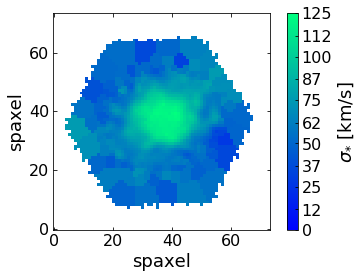

In [4]:
fig, ax = plt.subplots()

sigma_map = sigma_masked
############################################################################
# Determine limits of color scale
#---------------------------------------------------------------------------
maximum = ma.max(sigma_map)

cbar_ticks = np.linspace( 0, maximum, 11, dtype='int')

vel_im = ax.imshow( sigma_map, 
                        cmap='winter', 
                        origin='lower', 
                        vmin=0, 
                        vmax=maximum)

cbar = plt.colorbar( vel_im, ax=ax, ticks=cbar_ticks)
cbar.ax.tick_params( direction='in', labelsize=16)
cbar.set_label(r'$\sigma_{*}$ [km/s]', fontsize=18) # formatting for paper

ax.tick_params( axis='both', direction='in', labelsize=16)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_xlabel('spaxel', fontsize=18)
ax.set_ylabel('spaxel', fontsize=18)

## Compare Pipe3D and DAP stellar velocity dispersion maps

check ivar map for dap

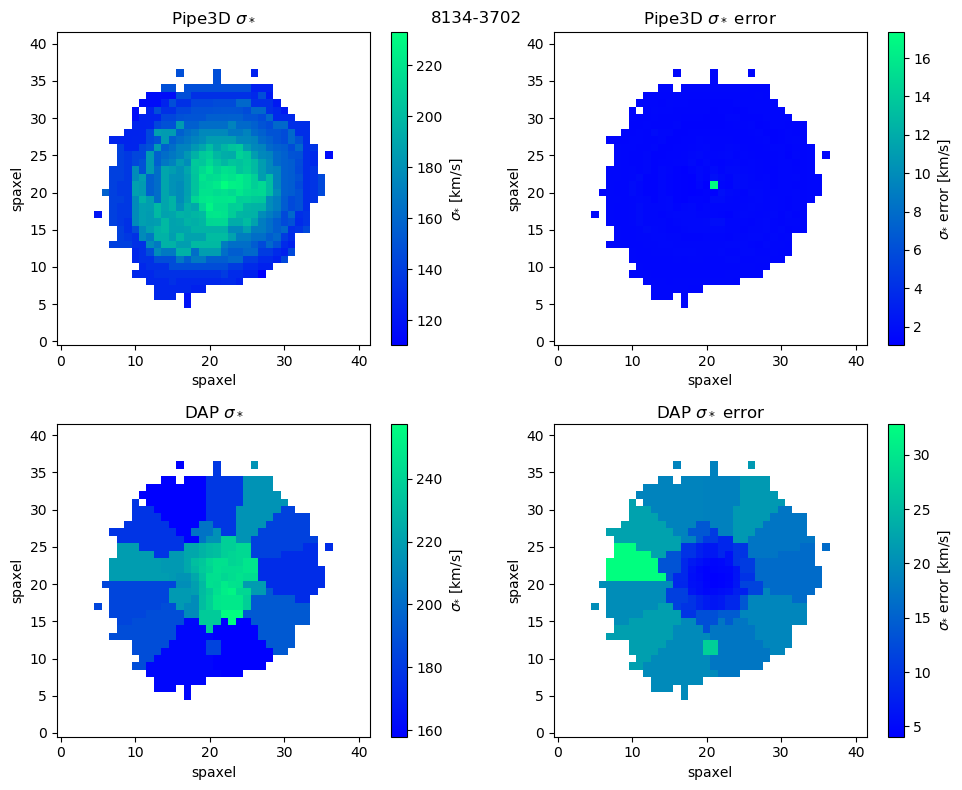

In [61]:
test_gals = ['8134-3702', '8241-3701', '8262-6102']

maps = extract_data(MAP_FOLDER, test_gals[0], ['star_sigma'])
pipe3d_maps = extract_Pipe3d_data(PIPE3D_FOLDER, test_gals[0], ['star_sigma'])

corr_dap_sigma = np.sqrt(maps['star_sigma']**2 - maps['star_sigma_corr']**2)


# plot
fig, ax = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(10)
    
    
psigma_im = ax[0,0].imshow(ma.array(pipe3d_maps['star_sigma'], mask = maps['star_sigma_mask']), cmap='winter')
ax[0,0].set_title(r'Pipe3D $\sigma_*$')
ax[0,0].set_xlabel('spaxel')
ax[0,0].set_ylabel('spaxel')
ax[0,0].invert_yaxis()
cbar = plt.colorbar( psigma_im, ax=ax[0,0])
cbar.set_label(r'$\sigma_{*}$ [km/s]')


psigma_err_im = ax[0,1].imshow(ma.array(pipe3d_maps['star_sigma_err'], mask = maps['star_sigma_mask']), cmap='winter')
ax[0,1].set_title(r'Pipe3D $\sigma_*$ error')
ax[0,1].set_xlabel('spaxel')
ax[0,1].set_ylabel('spaxel')
ax[0,1].invert_yaxis()
cbar = plt.colorbar( psigma_err_im, ax=ax[0,1])
cbar.set_label(r'$\sigma_{*}$ error [km/s]')


dap_sigma_im = ax[1,0].imshow(ma.array(corr_dap_sigma, mask = maps['star_sigma_mask']), cmap='winter')
ax[1,0].set_title(r'DAP $\sigma_*$')
ax[1,0].set_xlabel('spaxel')
ax[1,0].set_ylabel('spaxel')
ax[1,0].invert_yaxis()
cbar = plt.colorbar( dap_sigma_im, ax=ax[1,0])
cbar.set_label(r'$\sigma_{*}$ [km/s]')


dap_sigma_err_im = ax[1,1].imshow(1/np.sqrt(ma.array(maps['star_sigma_ivar'],mask = maps['star_sigma_mask'])),cmap='winter' )
ax[1,1].set_title(r'DAP $\sigma_*$ error')
ax[1,1].set_xlabel('spaxel')
ax[1,1].set_ylabel('spaxel')
ax[1,1].invert_yaxis()
cbar = plt.colorbar(dap_sigma_err_im, ax=ax[1,1])
cbar.set_label(r'$\sigma_{*}$ error [km/s]')

fig.suptitle(test_gals[0])
fig.tight_layout()
fig.savefig(PLOT_DIR + '/results_plots/' + test_gals[0] + '_star_sigma_test.png', format='png')

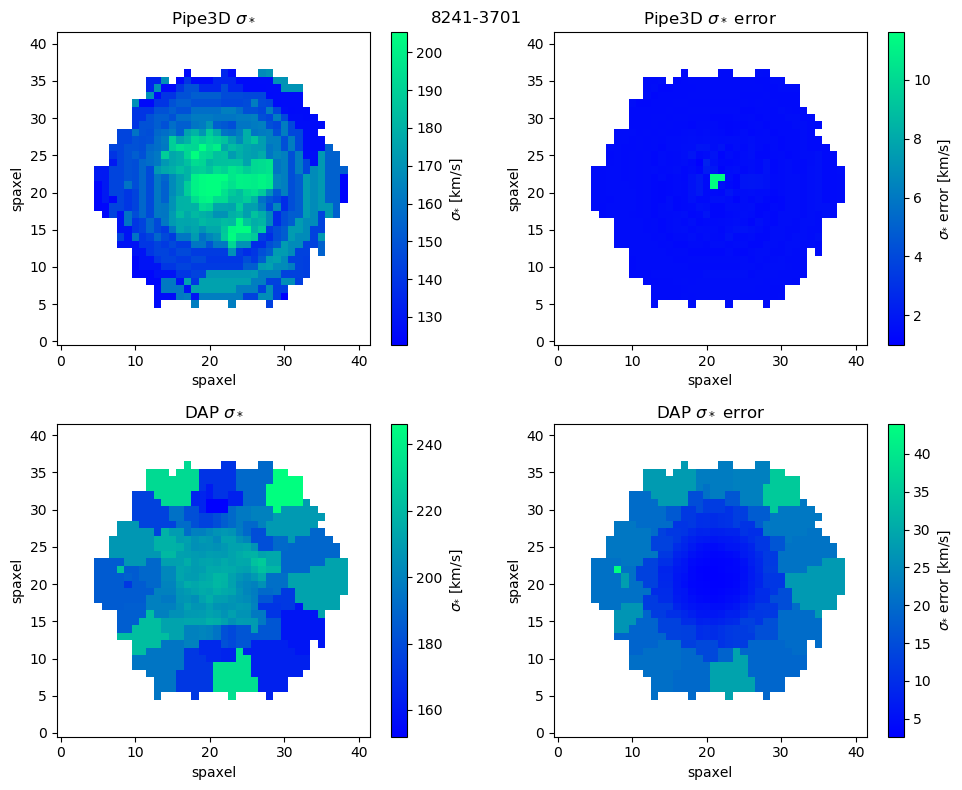

In [62]:
maps = extract_data(MAP_FOLDER, test_gals[1], ['star_sigma'])
pipe3d_maps = extract_Pipe3d_data(PIPE3D_FOLDER, test_gals[1], ['star_sigma'])


# plot
fig, ax = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(10)

corr_dap_sigma = np.sqrt(maps['star_sigma']**2 - maps['star_sigma_corr']**2)
    
    
psigma_im = ax[0,0].imshow(ma.array(pipe3d_maps['star_sigma'], mask = maps['star_sigma_mask']), cmap='winter')
ax[0,0].set_title(r'Pipe3D $\sigma_*$')
ax[0,0].set_xlabel('spaxel')
ax[0,0].set_ylabel('spaxel')
ax[0,0].invert_yaxis()
cbar = plt.colorbar( psigma_im, ax=ax[0,0])
cbar.set_label(r'$\sigma_{*}$ [km/s]')


psigma_err_im = ax[0,1].imshow(ma.array(pipe3d_maps['star_sigma_err'], mask = maps['star_sigma_mask']), cmap='winter')
ax[0,1].set_title(r'Pipe3D $\sigma_*$ error')
ax[0,1].set_xlabel('spaxel')
ax[0,1].set_ylabel('spaxel')
ax[0,1].invert_yaxis()
cbar = plt.colorbar( psigma_err_im, ax=ax[0,1])
cbar.set_label(r'$\sigma_{*}$ error [km/s]')


dap_sigma_im = ax[1,0].imshow(ma.array(corr_dap_sigma, mask = maps['star_sigma_mask']), cmap='winter')
ax[1,0].set_title(r'DAP $\sigma_*$')
ax[1,0].set_xlabel('spaxel')
ax[1,0].set_ylabel('spaxel')
ax[1,0].invert_yaxis()
cbar = plt.colorbar( dap_sigma_im, ax=ax[1,0])
cbar.set_label(r'$\sigma_{*}$ [km/s]')


dap_sigma_err_im = ax[1,1].imshow(1/np.sqrt(ma.array(maps['star_sigma_ivar'],mask = maps['star_sigma_mask'])),cmap='winter' )
ax[1,1].set_title(r'DAP $\sigma_*$ error')
ax[1,1].set_xlabel('spaxel')
ax[1,1].set_ylabel('spaxel')
ax[1,1].invert_yaxis()
cbar = plt.colorbar(dap_sigma_err_im, ax=ax[1,1])
cbar.set_label(r'$\sigma_{*}$ error [km/s]')

fig.suptitle(test_gals[1])
fig.tight_layout()
fig.savefig(PLOT_DIR + '/results_plots/' + test_gals[1] + '_star_sigma_test.png', format='png')

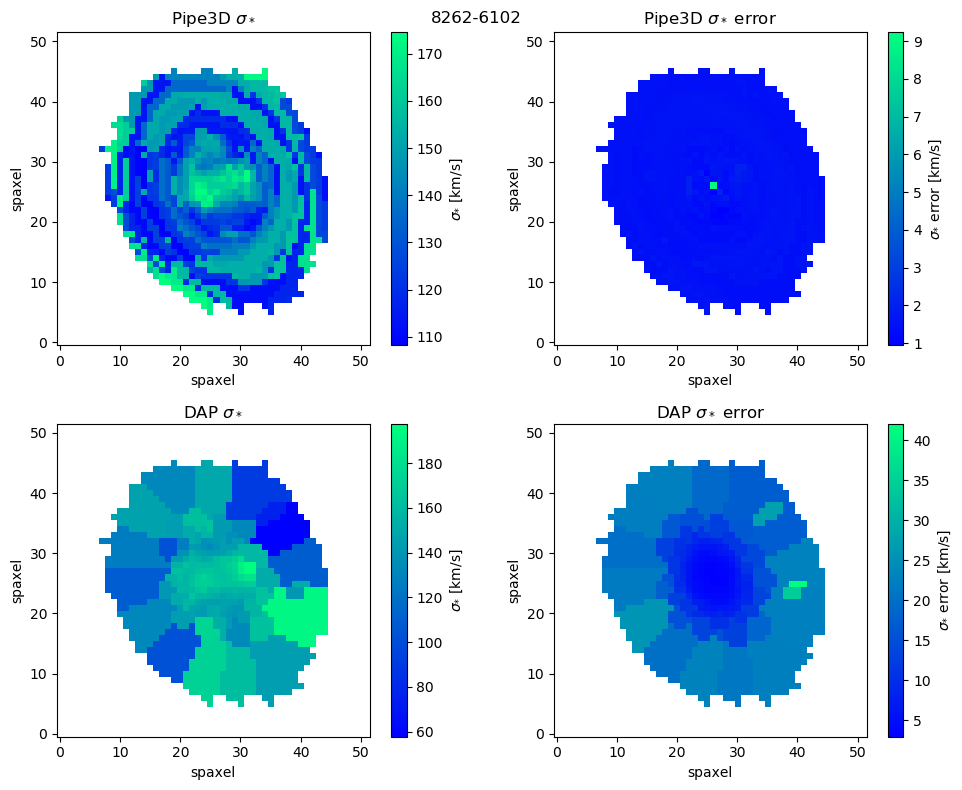

In [63]:
maps = extract_data(MAP_FOLDER, test_gals[2], ['star_sigma'])
pipe3d_maps = extract_Pipe3d_data(PIPE3D_FOLDER, test_gals[2], ['star_sigma'])


# plot
fig, ax = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(10)

corr_dap_sigma = np.sqrt(maps['star_sigma']**2 - maps['star_sigma_corr']**2)
    
psigma_im = ax[0,0].imshow(ma.array(pipe3d_maps['star_sigma'], mask = maps['star_sigma_mask']), cmap='winter')
ax[0,0].set_title(r'Pipe3D $\sigma_*$')
ax[0,0].set_xlabel('spaxel')
ax[0,0].set_ylabel('spaxel')
ax[0,0].invert_yaxis()
cbar = plt.colorbar( psigma_im, ax=ax[0,0])
cbar.set_label(r'$\sigma_{*}$ [km/s]')


psigma_err_im = ax[0,1].imshow(ma.array(pipe3d_maps['star_sigma_err'], mask = maps['star_sigma_mask']), cmap='winter')
ax[0,1].set_title(r'Pipe3D $\sigma_*$ error')
ax[0,1].set_xlabel('spaxel')
ax[0,1].set_ylabel('spaxel')
ax[0,1].invert_yaxis()
cbar = plt.colorbar( psigma_err_im, ax=ax[0,1])
cbar.set_label(r'$\sigma_{*}$ error [km/s]')


dap_sigma_im = ax[1,0].imshow(ma.array(corr_dap_sigma, mask = maps['star_sigma_mask']), cmap='winter')
ax[1,0].set_title(r'DAP $\sigma_*$')
ax[1,0].set_xlabel('spaxel')
ax[1,0].set_ylabel('spaxel')
ax[1,0].invert_yaxis()
cbar = plt.colorbar( dap_sigma_im, ax=ax[1,0])
cbar.set_label(r'$\sigma_{*}$ [km/s]')


dap_sigma_err_im = ax[1,1].imshow(1/np.sqrt(ma.array(maps['star_sigma_ivar'],mask = maps['star_sigma_mask'])),cmap='winter' )
ax[1,1].set_title(r'DAP $\sigma_*$ error')
ax[1,1].set_xlabel('spaxel')
ax[1,1].set_ylabel('spaxel')
ax[1,1].invert_yaxis()
cbar = plt.colorbar(dap_sigma_err_im, ax=ax[1,1])
cbar.set_label(r'$\sigma_{*}$ error [km/s]')

fig.suptitle(test_gals[2])
fig.tight_layout()
fig.savefig(PLOT_DIR + '/results_plots/' + test_gals[2] + '_star_sigma_test.png', format='png')

## Try S/N < 3 cut on DAP maps

In [130]:
maps = extract_data(MAP_FOLDER, test_gals[2], ['star_sigma'])

corr = np.sqrt(maps['star_sigma']**2 - maps['star_sigma_corr']**2)

sn3_mask = maps['star_sigma'] * np.sqrt(maps['star_sigma_ivar']) < 5
sn4_mask = maps['star_sigma'] * np.sqrt(maps['star_sigma_ivar']) < 10
sn5_mask = maps['star_sigma'] * np.sqrt(maps['star_sigma_ivar']) < 20
default_mask = maps['star_sigma_mask']
mstar_sigma = ma.array(corr, mask = maps['star_sigma_mask'])
sn3_mstar_sigma = ma.array(corr, mask = np.logical_or(default_mask > 0,sn3_mask))
sn4_mstar_sigma = ma.array(corr, mask = np.logical_or(default_mask > 0,sn4_mask))
sn5_mstar_sigma = ma.array(corr, mask = np.logical_or(default_mask > 0,sn5_mask))

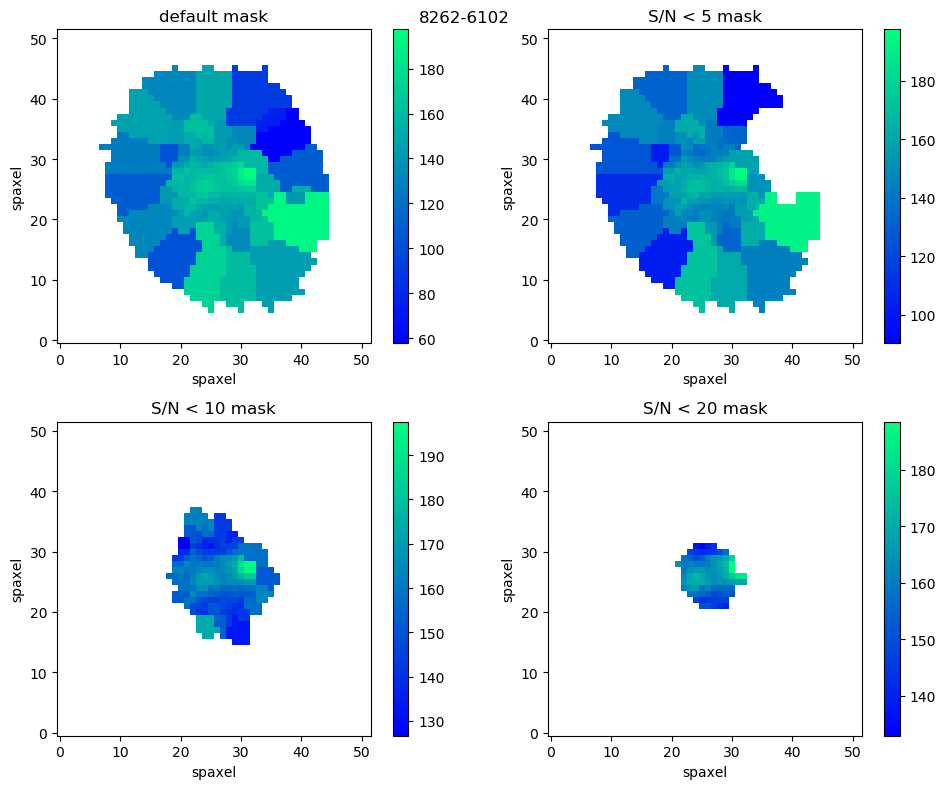

In [131]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(10)

m = ax[0,0].imshow(mstar_sigma, cmap='winter')
cbar = plt.colorbar( m, ax=ax[0,0])
ax[0,0].set_xlabel('spaxel')
ax[0,0].set_ylabel('spaxel')
ax[0,0].invert_yaxis()
ax[0,0].set_title('default mask')

sn3 = ax[0,1].imshow(sn3_mstar_sigma, cmap='winter')
cbar = plt.colorbar( sn3, ax=ax[0,1])
ax[0,1].set_xlabel('spaxel')
ax[0,1].set_ylabel('spaxel')
ax[0,1].invert_yaxis()
ax[0,1].set_title('S/N < 5 mask')


sn4 = ax[1,0].imshow(sn4_mstar_sigma, cmap='winter')
cbar = plt.colorbar( sn4, ax=ax[1,0])
ax[1,0].set_xlabel('spaxel')
ax[1,0].set_ylabel('spaxel')
ax[1,0].invert_yaxis()
ax[1,0].set_title('S/N < 10 mask')

sn5 = ax[1,1].imshow(sn5_mstar_sigma, cmap='winter')
cbar = plt.colorbar( sn5, ax=ax[1,1])
ax[1,1].set_xlabel('spaxel')
ax[1,1].set_ylabel('spaxel')
ax[1,1].invert_yaxis()
ax[1,1].set_title('S/N < 20 mask')


fig.suptitle(test_gals[2])
fig.tight_layout()
fig.savefig(PLOT_DIR + '/results_plots/' + test_gals[2] + '_star_sigma_SN_test.png', format='png')

## test stellar mass bulge fit

In [28]:
from scipy.optimize import curve_fit

sys.path.insert(1, '/Users/nityaravi/Documents/Github/RotationCurves/spirals/')
from DRP_rotation_curve_functions import calc_stellar_mass

sys.path.insert(1, '/Users/nityaravi/Documents/Github/RotationCurves/ellipticals/')
from IO_data import *

In [11]:
#ripping and modifying functions from disk_mass, disk_mass_functions

def calc_mass_curve(sMass_density,
                    sMass_density_err,
                    flux,
                    ba, 
                    phi, 
                    z, 
                    gal_ID, 
                    IMAGE_DIR=None, 
                    IMAGE_FORMAT='png'):
    '''
    Extract the mass as a function of radius from the stellar mass density map, 
    and convert this to a rotation curve (velocity as a function of radius).


    PARAMETERS
    ==========

    sMass_density : numpy array of shape (n,n)
        Stellar mass density map in units of log(Msun/spaxel^2)
        
    sMass_density_err : numpy array of shape (n,n)
        stellar mass density error map in log(Msun/spaxel^2)

    flux : numpy array of shape (n,n)
        g-band weighted mean flux data

    map_mask : numpy array of shape (n,n)
        Bitmask for the stellar mass density map

    ba : float
        Ratio of the galaxy's minor axis to major axis

    phi : float
        Angle (east of north) of rotation in the 2-D, observational plane

        NOTE: east is 'left' per astronomy convention

    z : float
        Galaxy redshift

    gal_ID : string
        [PLATE]-[IFU]

    IMAGE_DIR : string
        File path to which various produced images are saved.  
        Default value is None (do not save images).

    IMAGE_FORMAT : string
        Saved image file format.  Default format is png.


    RETURNS
    =======

    mass_table : astropy table
        Data table containing M(r) for the stellar mass of the galaxy.
    '''

    ############################################################################
    # Mask the maps
    #---------------------------------------------------------------------------
    sMass_mask = np.isnan(sMass_density)

    msMass_density = ma.array(sMass_density, mask=sMass_mask)

    sMass_err_mask = np.isnan(sMass_density_err)
    msMass_density_err = ma.array(sMass_density_err, mask=sMass_err_mask)

    mflux = ma.array(flux, mask=sMass_mask)
    ############################################################################

    # find center
    optical_center = np.unravel_index(ma.argmax(mflux), mflux.shape)
        
    ############################################################################


    ############################################################################
    # If all of the data is masked, return null values for everything
    #---------------------------------------------------------------------------
    if np.sum(sMass_mask == 0) == 0:

        mass_vel_table = Table()

        mass_vel_table['radius'] = [np.NaN]
        mass_vel_table['M_star'] = [np.NaN]
        mass_vel_table['M_star_err'] = [np.NaN]

        print('ALL DATA POINTS FOR THE GALAXY ARE MASKED!')
    ############################################################################


    ############################################################################
    # If there is unmasked data in the map, execute the function as normal.
    #---------------------------------------------------------------------------
    else:
        mass_table = find_mass_curve(z,
                                     sMass_mask,
                                     msMass_density,
                                     msMass_density_err,
                                     optical_center, 
                                     phi, 
                                     ba)
    ############################################################################

    return mass_table


In [5]:
def find_mass_curve(z, 
                    map_mask, 
                    msMass_density, 
                    msMass_density_err,
                    optical_center, 
                    phi, 
                    ba):
    '''
    Measure the rotation curve for the disk component of the galaxy based on the 
    stellar mass density map.


    PARAMETERS
    ==========

    z : float
        Redshift of galaxy

    map_mask : numpy array of shape (n,n)
        Boolean array where true values represent spaxels which are masked

    msMass_density : numpy array of shape (n,n)
        Masked stellar mass density map

    optical_center : tuple of shape (2,1)
        Array coordinates of the kinematic center of the galaxy

    phi_EofN_deg : float
        angle (east of north) of rotation in the 2-D observational plane
        NOTE: East is 'left' per astronomy convention

    axis_ratio : float
        b/a Sersic axis ratio for galaxy


    RETURNS
    =======

    data_table : astropy table
        Table of output data, including the deprojected radius and M(r)
    '''


    ############################################################################
    # Convert pixel distance to physical distances.
    #---------------------------------------------------------------------------
    dist_to_galaxy_Mpc = c*z/H_0
    dist_to_galaxy_kpc = dist_to_galaxy_Mpc*1000

    pix_scale_factor = dist_to_galaxy_kpc*np.tan(MANGA_SPAXEL_SIZE)
    ############################################################################


    ############################################################################
    # Create a meshgrid for all coordinate points based on the dimensions of
    # the stellar mass density numpy array.
    #---------------------------------------------------------------------------
    array_length = msMass_density.shape[0]  # y-coordinate distance
    array_width = msMass_density.shape[1]  # x-coordinate distance

    X_RANGE = np.arange(0, array_width, 1)
    Y_RANGE = np.arange(0, array_length, 1)
    X_COORD, Y_COORD = np.meshgrid( X_RANGE, Y_RANGE)
    ############################################################################


    ############################################################################
    # Initialization code to draw the elliptical annuli.
    #---------------------------------------------------------------------------
    phi_elip = (90 - phi)*np.pi/180.

    x_diff = X_COORD - optical_center[1]
    y_diff = Y_COORD - optical_center[0]

    ellipse = (x_diff*np.cos(phi_elip) - y_diff*np.sin(phi_elip))**2 \
              + (x_diff*np.sin(phi_elip) + y_diff*np.cos(phi_elip))**2 \
              / ba**2
    ############################################################################


    ############################################################################
    # Initialize the lists for the columns of the output table
    #---------------------------------------------------------------------------
    radius = []

    sMass_interior_curve = []
    sMass_interior_curve_err = []
    ############################################################################


    ############################################################################
    # Initialize the stellar mass surface density interior to an annulus to
    # be 0 solar masses.
    #---------------------------------------------------------------------------
    sMass_interior = 0.
    sMass_interior_err2 = 0.
    sMass_interior_err = 0.
    ############################################################################


    ############################################################################
    #---------------------------------------------------------------------------
    dR = 2
    R = 2

    while True:

        deproj_dist_kpc = R*pix_scale_factor

        ########################################################################
        # Define an eliptical annulus and check if there is at least one point 
        # within the mask.
        #-----------------------------------------------------------------------
        pix_between_annuli = np.logical_and( (R - dR)**2 <= ellipse, 
                                             ellipse < R**2)

        if not np.any( map_mask[ pix_between_annuli] == 0):
            break
        ########################################################################


        ########################################################################
        # Extract the stellar mass interior to that annulus.
        #-----------------------------------------------------------------------
        sMass_interior, sMass_interior_err2 = calc_stellar_mass(sMass_interior,
                                            sMass_interior_err2,
                                           10**msMass_density, 
                                           10**msMass_density_err,
                                           pix_between_annuli)

        sMass_interior_err = np.sqrt(sMass_interior_err2)
        
        ########################################################################
    

        ########################################################################
        # Append the corresponding values to their respective arrays to write to 
        # the output data file.
        #-----------------------------------------------------------------------
        if np.isfinite(sMass_interior):
            radius.append( deproj_dist_kpc)

            sMass_interior_curve.append( np.log10(sMass_interior))
            sMass_interior_curve_err.append( np.log10(sMass_interior_err))
        ########################################################################


        ########################################################################
        # Increment the radius of the annulus R by dR
        #-----------------------------------------------------------------------
        R += dR
        ########################################################################


    ############################################################################
    # Build output data table
    #---------------------------------------------------------------------------
    data_table = Table()

    data_table['radius'] = radius

    data_table['M_star'] = sMass_interior_curve
    data_table['M_star_err'] = sMass_interior_curve_err
    
    ############################################################################


    return data_table


In [101]:
def fit_mass_curve(data_table, gal_ID, COV_DIR=None, IMAGE_DIR=None, IMAGE_FORMAT='eps'):
    '''
    Fit the stellar mass rotation curve to the disk velocity function.


    PARAMETERS
    ==========

    data_table : astropy tables
        Contains the deprojected radius and the mass within that radius

    gal_ID : string
        [PLATE]-[IFU]
    
    cov_dir : string
        path to directory for covariance matrices. default is none so covariance
        matrix will save in current directory

    IMAGE_DIR : string
        File path to which various produced images are saved.  
        Default value is None (do not save images).

    IMAGE_FORMAT : string
        Saved image file format.  Default format is eps.


    RETURNS
    =======

    best_fit_values : dictionary
        Values (and uncertainties) of the best-fit parameters
    '''


    ############################################################################
    # Set up initial guesses for the best-fit parameters
    #---------------------------------------------------------------------------
    
    rho_bulge_guess =  10**9.

    R_bulge_guess = 1.
        
    param_guesses = [rho_bulge_guess, R_bulge_guess]

    ############################################################################


    ############################################################################
    # Set up bounds for the best-fit parameters
    #---------------------------------------------------------------------------
    # Bulge central density [M_sol/kpc^3] 
    rho_bulge_min = 0.
    rho_bulge_max = 1e14
    rho_bulge_bounds  = (rho_bulge_min, rho_bulge_max)

    # Bulge scale radius [kpc]
    R_bulge_min = 0.
    R_bulge_max = 100.
    R_bulge_bounds = (R_bulge_min, R_bulge_max)


    param_bounds = ([rho_bulge_min, R_bulge_min], 
                        [rho_bulge_max, R_bulge_max])
    ############################################################################


    ############################################################################
    # Find the best-fit parameters
    #---------------------------------------------------------------------------
    try:
        popt, pcov = curve_fit(exponential_sphere, 
                                    data_table['radius'], 
                                    10**data_table['M_star'], 
                                    p0=param_guesses,
                                    bounds=param_bounds,
                                    sigma=10**data_table['M_star_err']
                                    )


        #-----------------------------------------------------------------------
        # Determine uncertainties in the fitted parameters
        #-----------------------------------------------------------------------
        np.save(COV_DIR + gal_ID + '_cov.npy', pcov) 

        perr = np.sqrt(np.diag(pcov))
        #-----------------------------------------------------------------------


        #-----------------------------------------------------------------------
        # Unpack results
        #-----------------------------------------------------------------------
        chi2 = chi2_mass(popt, 
                     data_table['radius'], 
                     data_table['M_star'], 
                     data_table['M_star_err'])




        best_fit_values = {'rho_c' : popt[0],
                        'rho_c_err' : perr[0],
                        'R_scale' : popt[1],
                        'R_scale_err' : perr[1], 
                        'chi2_M_star': chi2}


        #-----------------------------------------------------------------------


        #-----------------------------------------------------------------------
        # Plot data and best-fit curve
        #-----------------------------------------------------------------------
        
#         plot_stellar_mass_dist(gal_ID,
#                               data_table,
#                               best_fit_values,
#                               chi2,
#                               cov_dir,
#                               IMAGE_DIR,
#                               IMAGE_FORMAT)
        
#         if IMAGE_DIR is None:
#             plt.show()
    #-----------------------------------------------------------------------
        
    except RuntimeError:
        print(gal_ID, 'fit did not converge.', flush=True)

        best_fit_values = None
 
    ############################################################################

    return best_fit_values


In [80]:
def exponential_sphere(r, rho_c, a):
    '''
    exponential sphere mass distribution
    
    PARAMETERS
    ==========
    r : float
        radius [kpc]
        
    rho_c : float
        central density [M_sun/kpc^3]
        
    a : float
        scale radius [kpc]
        
    RETURN
    ======
    
    M : float
        mass within radius r [M_sun]
    
    '''
    
    x = r/a
    F = 1 - np.exp(-x)*(1 + x + x**2/2)
    M_0 = 8 * np.pi * a**3 * rho_c
    M = M_0 * F
    
    return M
    

In [173]:
def calc_tot_stellar_mass(gal_ID, rho_c, a, COV_DIR=''):
    '''
    
    calculate total mass of exponential sphere
    
    PARAMETERS
    ==========
    gal_ID : string
        galaxy plateifu
        
    cov_dir : string
        covariance directory
        
    rho_c : float
        best fit value for central density [M_sun/kpc^3]
        
    a : float
        best fit value for scale radius [kpc]
        
    RETURN
    ======
    M_0 : float
        total mass of exponential sphere [M_sun]
    
    M_0_err : float
        uncertainty on M_0
    
    '''
    
    # load covariance matrix
    cov = np.load(COV_DIR + gal_ID + '_cov.npy')
    
    # calculate total mass
    M_0 = 8 * np.pi * a**3 * rho_c
    
    # calculate uncertainty on total mass
    M_0_err = M_0 * np.sqrt(9 / a**2 * cov[1,1] + cov[0,0] / rho_c**2 + 6 * cov[1,0] / (a * rho_c))
    
    return M_0, M_0_err
    

In [174]:
def chi2_mass(params, r, m_star, m_star_err):
    '''
    
    calculate reduced chi2 of exponential sphere mass curve
    
    '''
    
    model = exponential_sphere(r, params[0], params[1])
    
    chi2 = np.sum((model - m_star)**2/m_star_err**2)
    n_chi2 = np.sqrt(chi2)
    
    return n_chi2

In [175]:
H_0 = 100      # Hubble's Constant in units of h km/s/Mpc
c = 299792.458 # Speed of light in units of km/s
G = 4.30091E-6 # Gravitation constant in units of (km/s)^2 kpc/Msun

MANGA_FIBER_DIAMETER = 2*(1/60)*(1/60)*(np.pi/180) # angular fiber diameter (2") in radians
MANGA_SPAXEL_SIZE = 0.5*(1/60)*(1/60)*(np.pi/180)  # spaxel size (0.5") in radians

In [176]:
# main

MANGA_FOLDER = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/'
PIPE3D_FOLDER = MANGA_FOLDER + '/Pipe3D/'
MAP_FOLDER = MANGA_FOLDER + '/DR17/'
IMAGE_DIR = MANGA_FOLDER + '/Ellipticals_Images/'
DRP_FILENAME = MANGA_FOLDER + '/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_StelVelDispDAPMeanSigma_Mvir_smoothness_lt_2_dipole.fits'
test_gal = '8262-6102'

pipe3d_maps = extract_Pipe3d_data(PIPE3D_FOLDER, test_gal, ['sMass'])
maps = extract_data(MAP_FOLDER, test_gal, ['Ha', 'flux'])

DRP_table = Table.read(DRP_FILENAME, format='fits')
DRP_index = {}
for i in range(len(DRP_table)):
    gal_ID = DRP_table['plateifu'][i]
    DRP_index[gal_ID] = i

i_DRP = DRP_index[test_gal]

ba = DRP_table['nsa_elpetro_ba'][i_DRP]
phi = DRP_table['nsa_elpetro_phi'][i_DRP]
z = DRP_table['nsa_z'][i_DRP]

data_table = calc_mass_curve(pipe3d_maps['sMass_density'],
                    pipe3d_maps['sMass_density_err'],
                    maps['mflux'],
                    ba, 
                    phi, 
                    z, 
                    test_gal, 
                    IMAGE_DIR=None, 
                    IMAGE_FORMAT='png')

<ErrorbarContainer object of 3 artists>

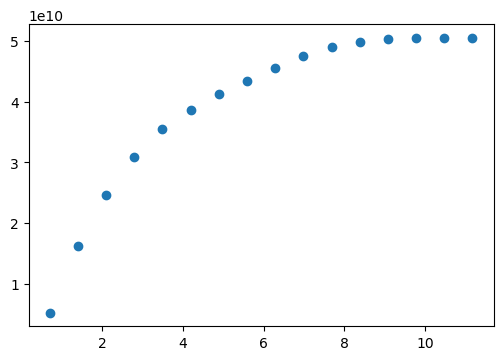

In [177]:
plt.errorbar(data_table['radius'], 10**data_table['M_star'], yerr=10**data_table['M_star_err'], fmt='o')

In [178]:
params = fit_mass_curve(data_table, test_gal, COV_DIR=COV_DIR, IMAGE_DIR=None, IMAGE_FORMAT='png')

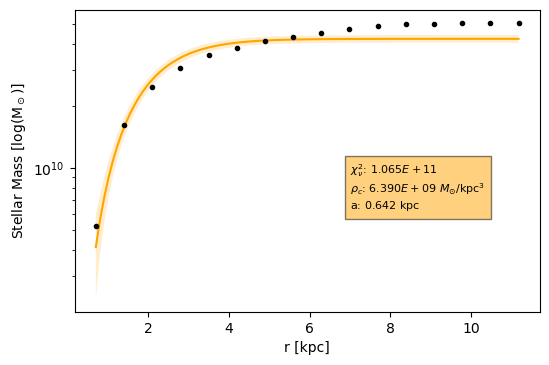

In [179]:
plt.errorbar(data_table['radius'], 10**data_table['M_star'], yerr=10**data_table['M_star_err'], 
             color='k', fmt='.')
r = np.linspace(data_table['radius'][0] , data_table['radius'][-1], 100)

cov = np.load(test_gal + '_cov.npy')
random_sample = np.random.multivariate_normal(mean=[params['rho_c'],
                                            params['R_scale']],
                                              cov=cov,
                                              size =1000)

is_good_random = (random_sample[:,0] > 0) & (random_sample[:,1] > 0) 
good_randoms = random_sample[is_good_random, :]

for i in range(len(r)):
    y_sample = exponential_sphere(r[i], good_randoms[:,0], good_randoms[:,1])

        
stdevs = np.nanstd(y_sample, axis=0)


y = exponential_sphere(r, params['rho_c'],params['R_scale'])

plt.plot(r, y, color='orange')
plt.fill_between(r, y-stdevs, y+stdevs, facecolor='orange',alpha=0.2)
plt.xlabel('r [kpc]')
plt.ylabel(r'Stellar Mass [log(M$_\odot$)]')
plt.yscale('log')

params_str ='\n'.join((
                            r'$\chi^{2}_{\nu}$: $%.3E$' % (params['chi2_M_star'], ), 
                            r'$\rho_{c}$: $%.3E$ $M_{\odot}$/kpc$^3$' % (params['rho_c'], ), 
                            r'a: $%.3f$ kpc' % (params['R_scale'], )
                            ))




plt.text(7, 10**9.8, params_str  , fontsize = 8, 
         bbox = dict(facecolor = 'orange', alpha = 0.5))

plt.show()

In [180]:
params

{'rho_c': 6390368143.605399,
 'rho_c_err': 716804886.5493888,
 'R_scale': 0.6420369056523775,
 'R_scale_err': 0.029462665578332374,
 'chi2_M_star': 106519103302.67372}

In [181]:
calc_tot_stellar_mass(test_gal, params['rho_c'], params['R_scale'], COV_DIR='')

(42505557504.92977, 1717425388.3322253)

In [182]:
cov = np.load(test_gal + '_cov.npy')

In [183]:
cov

array([[ 5.13809245e+17, -2.04472312e+07],
       [-2.04472312e+07,  8.68048663e-04]])

In [184]:
data_table

radius,M_star,M_star_err
float64,float64,float64
0.6983783529296385,9.717485305490584,0.4984218758335101
1.396756705859277,10.21119210070897,0.8211011021955691
2.0951350587889155,10.392366410360724,0.993610003202183
2.793513411718554,10.489085604735907,1.1246355352223134
3.491891764648192,10.550427624859477,1.2277872224764992
4.190270117577831,10.58629406454675,1.305096519839769
4.888648470507469,10.61584669168386,1.38158639737908
5.587026823437108,10.637124098179342,1.4411588883461048
6.285405176366746,10.658930503517137,1.4934159808694187


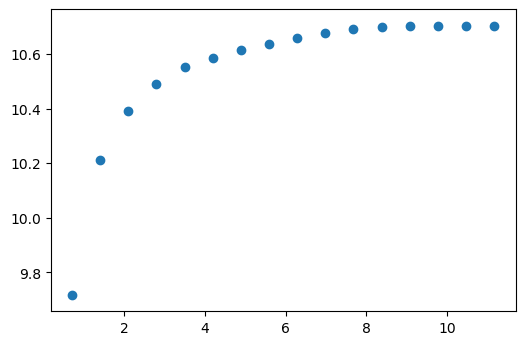

In [185]:
plt.scatter(data_table['radius'], data_table['M_star'])